In [2]:
import numpy as np 
import pandas as pd 
import warnings
warnings.simplefilter(action="ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

D:\Anaconda\envs\demandforecast\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda\envs\demandforecast\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Anaconda\envs\demandforecast\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
train = pd.read_csv('train.csv', parse_dates=['date'],index_col=['date'])

In [4]:
train

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74


In [5]:
train.dtypes

store    int64
item     int64
sales    int64
dtype: object

In [6]:
test = pd.read_csv('test.csv', parse_dates=['date'],index_col=['date'])

In [7]:
train['day']=train.index.day
train['month']=train.index.month
train['year']=train.index.year
train['dayofweek']=train.index.dayofweek
train['weekofyear']=train.index.isocalendar().week
train['is_weekend']=train.index.dayofweek

In [8]:
train

,store,item,sales,day,month,year,dayofweek,weekofyear,is_weekend
date,,,,,,,,,
2013-01-01,1,1,13,1,1,2013,1,1,1
2013-01-02,1,1,11,2,1,2013,2,1,2
2013-01-03,1,1,14,3,1,2013,3,1,3
2013-01-04,1,1,13,4,1,2013,4,1,4
2013-01-05,1,1,10,5,1,2013,5,1,5
...,...,...,...,...,...,...,...,...,...
2017-12-27,10,50,63,27,12,2017,2,52,2
2017-12-28,10,50,59,28,12,2017,3,52,3
2017-12-29,10,50,74,29,12,2017,4,52,4


In [9]:
test['day'] = test.index.day
test['month'] = test.index.month
test['year'] = test.index.year
test['dayofweek'] = test.index.dayofweek
test['weekofyear']  = test.index.isocalendar().week
test['is_weekend'] = test.index.dayofweek 

In [10]:
test

,id,store,item,day,month,year,dayofweek,weekofyear,is_weekend
date,,,,,,,,,
2018-01-01,0,1,1,1,1,2018,0,1,0
2018-01-02,1,1,1,2,1,2018,1,1,1
2018-01-03,2,1,1,3,1,2018,2,1,2
2018-01-04,3,1,1,4,1,2018,3,1,3
2018-01-05,4,1,1,5,1,2018,4,1,4
...,...,...,...,...,...,...,...,...,...
2018-03-27,44995,10,50,27,3,2018,1,13,1
2018-03-28,44996,10,50,28,3,2018,2,13,2
2018-03-29,44997,10,50,29,3,2018,3,13,3


In [11]:
rf = RandomForestRegressor(n_estimators=50, min_samples_leaf = 7, random_state=123)

# Add weights to most recent data
train_main = pd.concat([train,
                        train.loc[train.index > train.index.max()- pd.DateOffset(30, 'D')],
                        train.loc[train.index > train.index.max()- pd.DateOffset(30, 'D')],
                        train.loc[train.index > train.index.max()- pd.DateOffset(15, 'D')]
                       ])

# Train a model
rf.fit(X=train_main[['store', 'item','year','month','dayofweek','is_weekend']], y=train_main['sales'])

# Get predictions for the test set
test['sales'] = rf.predict(test[['store', 'item','year','month','dayofweek','is_weekend']])

In [19]:
test['sales']

date
2018-01-01    12.176630
2018-01-02    14.195067
2018-01-03    14.160875
2018-01-04    14.416942
2018-01-05    17.208043
                ...    
2018-03-27    65.649018
2018-03-28    68.284594
2018-03-29    72.854181
2018-03-30    80.755998
2018-03-31    82.562013
Name: sales, Length: 45000, dtype: float64

In [20]:
test[['store','item','sales']].to_csv('results.csv',index=False)

In [21]:
##------------------------------------

In [22]:
train

,store,item,sales,day,month,year,dayofweek,weekofyear,is_weekend
date,,,,,,,,,
2013-01-01,1,1,13,1,1,2013,1,1,1
2013-01-02,1,1,11,2,1,2013,2,1,2
2013-01-03,1,1,14,3,1,2013,3,1,3
2013-01-04,1,1,13,4,1,2013,4,1,4
2013-01-05,1,1,10,5,1,2013,5,1,5
...,...,...,...,...,...,...,...,...,...
2017-12-27,10,50,63,27,12,2017,2,52,2
2017-12-28,10,50,59,28,12,2017,3,52,3
2017-12-29,10,50,74,29,12,2017,4,52,4


In [23]:
# Add weights to most recent data
train_main = pd.concat([train,
                        train.loc[train.index > train.index.max()- pd.DateOffset(30, 'D')],
                        train.loc[train.index > train.index.max()- pd.DateOffset(30, 'D')],
                        train.loc[train.index > train.index.max()- pd.DateOffset(15, 'D')]
                       ])

In [24]:
train_main

,store,item,sales,day,month,year,dayofweek,weekofyear,is_weekend
date,,,,,,,,,
2013-01-01,1,1,13,1,1,2013,1,1,1
2013-01-02,1,1,11,2,1,2013,2,1,2
2013-01-03,1,1,14,3,1,2013,3,1,3
2013-01-04,1,1,13,4,1,2013,4,1,4
2013-01-05,1,1,10,5,1,2013,5,1,5
...,...,...,...,...,...,...,...,...,...
2017-12-27,10,50,63,27,12,2017,2,52,2
2017-12-28,10,50,59,28,12,2017,3,52,3
2017-12-29,10,50,74,29,12,2017,4,52,4


In [25]:
train_17 = train_main[train_main['year'] >= 2017]

In [26]:
train_17

,store,item,sales,day,month,year,dayofweek,weekofyear,is_weekend
date,,,,,,,,,
2017-01-01,1,1,19,1,1,2017,6,52,6
2017-01-02,1,1,15,2,1,2017,0,1,0
2017-01-03,1,1,10,3,1,2017,1,1,1
2017-01-04,1,1,16,4,1,2017,2,1,2
2017-01-05,1,1,14,5,1,2017,3,1,3
...,...,...,...,...,...,...,...,...,...
2017-12-27,10,50,63,27,12,2017,2,52,2
2017-12-28,10,50,59,28,12,2017,3,52,3
2017-12-29,10,50,74,29,12,2017,4,52,4


In [27]:
t = train_17.index
t

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=220000, freq=None)

In [28]:
Y = train_17['sales']

In [29]:
Y

date
2017-01-01    19
2017-01-02    15
2017-01-03    10
2017-01-04    16
2017-01-05    14
              ..
2017-12-27    63
2017-12-28    59
2017-12-29    74
2017-12-30    62
2017-12-31    82
Name: sales, Length: 220000, dtype: int64

In [30]:
train_17.drop(columns='sales',inplace=True)

In [31]:
train_17

,store,item,day,month,year,dayofweek,weekofyear,is_weekend
date,,,,,,,,
2017-01-01,1,1,1,1,2017,6,52,6
2017-01-02,1,1,2,1,2017,0,1,0
2017-01-03,1,1,3,1,2017,1,1,1
2017-01-04,1,1,4,1,2017,2,1,2
2017-01-05,1,1,5,1,2017,3,1,3
...,...,...,...,...,...,...,...,...
2017-12-27,10,50,27,12,2017,2,52,2
2017-12-28,10,50,28,12,2017,3,52,3
2017-12-29,10,50,29,12,2017,4,52,4


In [32]:
train_main.to_csv('S.csv', index=False)

In [33]:
train_not_17 = train_main[train_main['year'] != 2017]

In [34]:
train_not_17

,store,item,sales,day,month,year,dayofweek,weekofyear,is_weekend
date,,,,,,,,,
2013-01-01,1,1,13,1,1,2013,1,1,1
2013-01-02,1,1,11,2,1,2013,2,1,2
2013-01-03,1,1,14,3,1,2013,3,1,3
2013-01-04,1,1,13,4,1,2013,4,1,4
2013-01-05,1,1,10,5,1,2013,5,1,5
...,...,...,...,...,...,...,...,...,...
2016-12-27,10,50,60,27,12,2016,1,52,1
2016-12-28,10,50,43,28,12,2016,2,52,2
2016-12-29,10,50,68,29,12,2016,3,52,3


In [37]:
# Add weights to most recent data
train_main_not_17 = pd.concat([train_not_17,
                        train_not_17.loc[train_not_17.index > train_not_17.index.max()- pd.DateOffset(30, 'D')],
                        train_not_17.loc[train_not_17.index > train_not_17.index.max()- pd.DateOffset(30, 'D')],
                        train_not_17.loc[train_not_17.index > train_not_17.index.max()- pd.DateOffset(15, 'D')]
                       ])


In [38]:
rf.fit(X=train_main_not_17[['store', 'item','year','month','dayofweek','is_weekend']], y=train_main_not_17['sales'])

RandomForestRegressor(min_samples_leaf=7, n_estimators=50, random_state=123)

In [39]:
pred = rf.predict(train_17[['store','item','year','month','dayofweek','is_weekend']])

In [40]:
type(pred)

numpy.ndarray

In [41]:
pred = list(pred)

In [42]:
pred

[16.798528091413974,
 12.665080366492166,
 13.83191200533736,
 14.00271480915773,
 13.856384803347446,
 14.921177998581188,
 15.570024785679314,
 16.798528091413974,
 12.665080366492166,
 13.83191200533736,
 14.00271480915773,
 13.856384803347446,
 14.921177998581188,
 15.570024785679314,
 16.798528091413974,
 12.665080366492166,
 13.83191200533736,
 14.00271480915773,
 13.856384803347446,
 14.921177998581188,
 15.570024785679314,
 16.798528091413974,
 12.665080366492166,
 13.83191200533736,
 14.00271480915773,
 13.856384803347446,
 14.921177998581188,
 15.570024785679314,
 16.798528091413974,
 12.665080366492166,
 13.83191200533736,
 15.487195440033561,
 15.27649371968051,
 14.515163363980815,
 15.295243896028591,
 17.43371692497389,
 13.420443933695516,
 14.984510117063953,
 15.487195440033561,
 15.27649371968051,
 14.515163363980815,
 15.295243896028591,
 17.43371692497389,
 13.420443933695516,
 14.984510117063953,
 15.487195440033561,
 15.27649371968051,
 14.515163363980815,
 15.29

In [43]:
len(pred)

220000

In [44]:
import seaborn as sns

<AxesSubplot:xlabel='sales', ylabel='Density'>

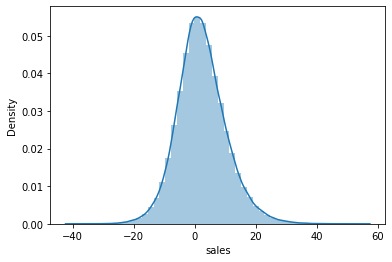

In [45]:
sns.distplot(Y-pred)

In [46]:

def mean_absolute_percentage_error(y_true, y_pred): 

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [47]:
type(pred)

list

In [48]:
type(Y)

pandas.core.series.Series

In [49]:
 mean_absolute_percentage_error(Y, pred)

13.13853690563603

In [50]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(Y, pred, squared=False)
rms

8.422968686523253

In [51]:
from sklearn.metrics import r2_score

In [52]:
r2 = r2_score(Y,pred)
r2

0.9246087778598306

In [41]:
import pickle
## open a file , where you want to store the data
file = open('random_forest_model.pkl','wb')

##dump information to that file
pickle.dump(rf, file)

In [42]:
rf.predict([[2,1,2028,3,2,2]])

array([24.96000258])

In [43]:
pred

[20.92640457135294,
 12.17663002933163,
 14.195066708609593,
 14.160874545509532,
 14.41694177523543,
 17.208042557757604,
 17.897501513282702,
 20.92640457135294,
 12.17663002933163,
 14.195066708609593,
 14.160874545509532,
 14.41694177523543,
 17.208042557757604,
 17.897501513282702,
 20.92640457135294,
 12.17663002933163,
 14.195066708609593,
 14.160874545509532,
 14.41694177523543,
 17.208042557757604,
 17.897501513282702,
 20.92640457135294,
 12.17663002933163,
 14.195066708609593,
 14.160874545509532,
 14.41694177523543,
 17.208042557757604,
 17.897501513282702,
 20.92640457135294,
 12.17663002933163,
 14.195066708609593,
 16.360745503839546,
 16.07411084120256,
 17.689043361047887,
 18.32474393082389,
 21.29108645319659,
 12.496472015847528,
 15.854853071710274,
 16.360745503839546,
 16.07411084120256,
 17.689043361047887,
 18.32474393082389,
 21.29108645319659,
 12.496472015847528,
 15.854853071710274,
 16.360745503839546,
 16.07411084120256,
 17.689043361047887,
 18.324743930

In [52]:
from sklearn.metrics import mean_absolute_error

mape = mean_absolute_error(Y, pred)
mape

5.400553947392076

In [53]:
MAPE_3_RF = mean_absolute_error(Y, pred)


In [54]:
MAPE_3_RF

5.400553947392076

In [49]:
len(j)

NameError: name 'j' is not defined

In [219]:
len(A)

220000

'[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]'

31

In [167]:
d = {i:j for i,j in enumerate(pred)}

In [168]:
d

{0: 20.92640457135294,
 1: 12.17663002933163,
 2: 14.195066708609593,
 3: 14.160874545509532,
 4: 14.41694177523543,
 5: 17.208042557757604,
 6: 17.897501513282702,
 7: 20.92640457135294,
 8: 12.17663002933163,
 9: 14.195066708609593,
 10: 14.160874545509532,
 11: 14.41694177523543,
 12: 17.208042557757604,
 13: 17.897501513282702,
 14: 20.92640457135294,
 15: 12.17663002933163,
 16: 14.195066708609593,
 17: 14.160874545509532,
 18: 14.41694177523543,
 19: 17.208042557757604,
 20: 17.897501513282702,
 21: 20.92640457135294,
 22: 12.17663002933163,
 23: 14.195066708609593,
 24: 14.160874545509532,
 25: 14.41694177523543,
 26: 17.208042557757604,
 27: 17.897501513282702,
 28: 20.92640457135294,
 29: 12.17663002933163,
 30: 14.195066708609593,
 31: 16.360745503839546,
 32: 16.07411084120256,
 33: 17.689043361047887,
 34: 18.32474393082389,
 35: 21.29108645319659,
 36: 12.496472015847528,
 37: 15.854853071710274,
 38: 16.360745503839546,
 39: 16.07411084120256,
 40: 17.689043361047887,
 41